In [1]:
from utility import *

In [ ]:
def resistance(voltage = '0', current = '0.0'):
    if float(current) == 0:
        print(r'Resistance is N/A.')
    else: 
        print(r'Resistance is {:.2f}Ω.'.format(float(voltage) / float(current)))
widgets.interact(resistance, voltage = widgets.BoundedFloatText(min = 0, max = 110, step = 0.1), current = widgets.BoundedFloatText(min = 0, max = 1, step = 0.01));

## Depo Time

In [ ]:
def FeSe_depo(start = '0', ML = '0', ahead_schedule = '60', preheat = '600'):
    print('Starting from {}secs, monolayer takes {}secs.'.format(int(start) * 2, (int(ML) - int(start)) * 2))
    duration = int((int(ML) - int(start)) * 2 * 1.3)
    minutes = int((duration + int(start) * 2 - int(ahead_schedule) + int(preheat)) // 60)
    seconds = int((duration + int(start) * 2 - int(ahead_schedule)) % 60)
    print(r'1.3ML should take {} second(s), namely, {}min{}secs'.format(duration, minutes, seconds))
widgets.interact(FeSe_depo, start = '0', ML = '0');

## Intensity Log

### Folder Path

In [2]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210422/RHEED20210421/'

### Calculate Intensity Log

In [17]:
# coordinates = np.genfromtxt(folder_path + 'cOordinates.txt', delimiter = ',').astype(int)
coordinates = [583, 289, 587, 348]
IntensityLog = []
rect_size = (coordinates[0] - coordinates[2]) * (coordinates[1] - coordinates[3])

for i in range(441):
    try:
        fig_data = plt.imread(folder_path + 'Image' + str(i + 1).zfill(4) + '.jpg')
        Intensity = 0
        for y in range(coordinates[1], coordinates[3]):
            for x in range(coordinates[0], coordinates[2]):
                Intensity += fig_data[y][x]
        IntensityLog.append(Intensity / rect_size)
    except IOError:
        continue

IntensityLog = np.array(IntensityLog)
IntensityLog = IntensityLog / IntensityLog.max()

### Create Figure

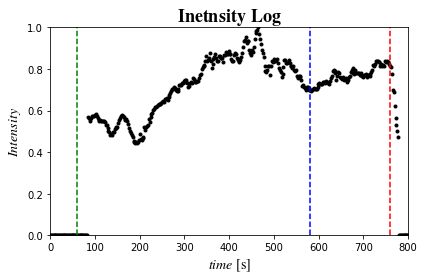

In [19]:
fig, axis = plt.subplots()
axis.plot(np.linspace(0, 882, 441), IntensityLog, '.', color = 'black')
axis.set_title(r'$\bf{Inetnsity\ Log}$', fontsize =18)
axis.set_xlabel(r'$time\ \mathrm{[s]}$', fontsize = 14)
axis.set_ylabel(r'$Intensity}$', fontsize = 14)
# axis.set_yticks([])
axis.set_xlim(0, 800)
axis.set_ylim(0, 1)

axis.axvline(x = 60, ls = '--', color = 'green')
axis.axvline(x = 760, ls = '--', color = 'red')
axis.axvline(x = 580, ls = '--', color = 'blue')
# axis.text(285, 65,r'$3\mathrm{min}$', color = 'black', fontsize = 12)
# axis.arrow(280, 70, 0, -20, width = 1.5, length_includes_head = False, head_width = 6, head_length = 3, color = 'black')
# axis.text(105, 40, r'$100\ \mathrm{s}$', fontsize =12)
# axis.arrow(90, 120, 30, 0, width = 1.5, color = 'green')
# axis.text(285, 25, r'Totally, $250\ \mathrm{s}$', fontsize =12)
# axis.arrow(380, 120, 30, 0, width = 1.5, color = 'red')
# 
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/IntensityLog.png', dpi = 600)

In [34]:
cut = IntensityLog[300: 400]
d_cut = np.diff(cut)
dd_cut = np.diff(d_cut)

In [32]:
np.where(d_cut == np.max(d_cut))

(array([80]),)

## Oscillation GIF

In [ ]:
fig = plt.figure(dpi = 100)
plt.axis('off')
fig.tight_layout()
frames = []
for i in range(30, 190):
    fig_data = plt.imread(folder_path + 'Image' + str(i + 1).zfill(4) + '.jpg')
    frame = plt.imshow(fig_data[:, :])
    frames.append([frame])
ani = anime.ArtistAnimation(fig,
                            frames,
                            interval = 100,
                            blit = True,
                            repeat = False)
ani.save('/Users/hunfen/OneDrive/General Files/ゼミー/20201224/FeSe_1UC_RHEED.gif')

## Temperature-Watt

In [ ]:
class electricity:
    def __init__(self, data = (0, 0, 0)):
        self.current = data[0]
        self.voltage = data[1]
        self.R = data[1] / data[0]
        self.power = data[0] * data[1]
        self.temp = data[2]

In [17]:
3.605551275463989 * 0.377

1.359292830849924

In [19]:
math.atan(6/500)

0.011999424049761282